## Setup

This guide is for Azure ML / Azure machine learning studio but might work elsewere as well. The notebook server is Jupyterlab

- Create a compute instance (GPU)
- Go to terminal and checkout this git project
- Execute `conda env create -f environment.yaml` and `conda activate ldm `
- Create jupyter kernel for the conda env `ipython kernel install --user --name ldm --display-name "Python (ldm)"`
- Login to huggingface `huggingface-cli login`. You need to create a free hugging-face account to download the pretrained model. Also concent to the model at https://huggingface.co/CompVis/stable-diffusion-v1-4
- Reopen jupyterlab
- Select kernel


0it [00:00, ?it/s]

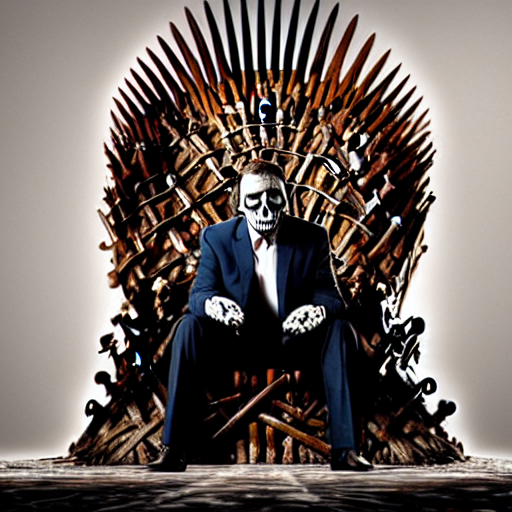

In [22]:
from diffusers import StableDiffusionPipeline, LMSDiscreteScheduler
from torch import autocast
from IPython.display import display

model_id = "CompVis/stable-diffusion-v1-4"
# Use the K-LMS scheduler here instead
scheduler = LMSDiscreteScheduler(beta_start=0.00085, beta_end=0.012, beta_schedule="scaled_linear", num_train_timesteps=1000)
pipe = StableDiffusionPipeline.from_pretrained(model_id, scheduler=scheduler, use_auth_token=True)
pipe = pipe.to("cuda")

prompt = "surrealistic. emperor Bill Gates sitting on iron throne. dark eyes. skull mask. Día de los Muertos. god rays. octane render. hyper realism. intricate details. cinematic. high detail"
with autocast("cuda"):
    image = pipe(prompt, guidance_scale=7.5)["sample"][0]  
 
display(image)

#image.save("astronaut_rides_horse.png")

In [ ]:
#Grid it (Takes lot of GPU memory, could not run myself other that 2 images)

from PIL import Image

def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

num_images = 2
prompt = ["surrealistic. cartoon Bill Gates sitting on iron throne. Día de los Muertos. god rays. octane render. hyper realism. intricate details. cinematic. high detail"] * num_images

images = pipe(prompt)["sample"]

grid = image_grid(images, rows=1, cols=2)
display(grid)

0it [00:00, ?it/s]